# Labs

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

蒙地卡羅求解與筆記

## Reference

1. MIT 6.0002 Introduction to Computational Thinking and Data - Monte Carlo Simulation : https://www.youtube.com/watch?v=OgO1gpXSUzU

2. 蒙特卡洛原理代码 monte carlo : https://blog.csdn.net/yjinyyzyq/article/details/86600393

3. 蒙特卡洛法高维数值积分： Vegas : https://zhuanlan.zhihu.com/p/264315872

4. 一文详解蒙特卡洛（Monte Carlo）法及其应用 : https://blog.csdn.net/qq_39521554/article/details/79046646

5. https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration

6. 蒙特卡罗方法详解 : https://zhuanlan.zhihu.com/p/369099011

7. https://zh.wikipedia.org/zh-tw/%E8%92%99%E5%9C%B0%E5%8D%A1%E7%BE%85%E6%96%B9%E6%B3%95

8. https://github.com/gplepage/vegas

9. https://vegas.readthedocs.io/en/latest/

10. https://arxiv.org/abs/2009.05112

11. vegas 原始文献：G. P. Lepage, J. Comput. Phys. 27(1978) 192.

## 1. Java Demo

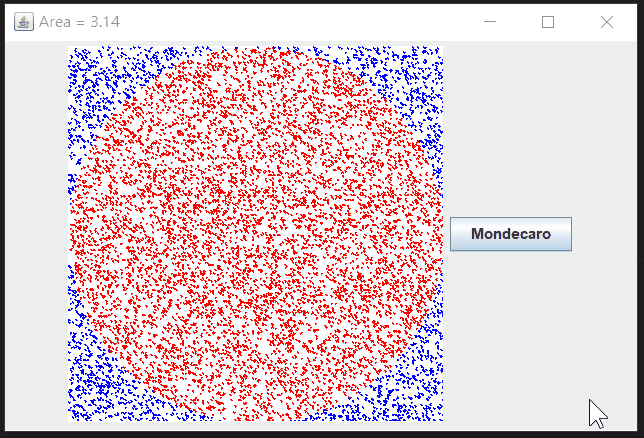

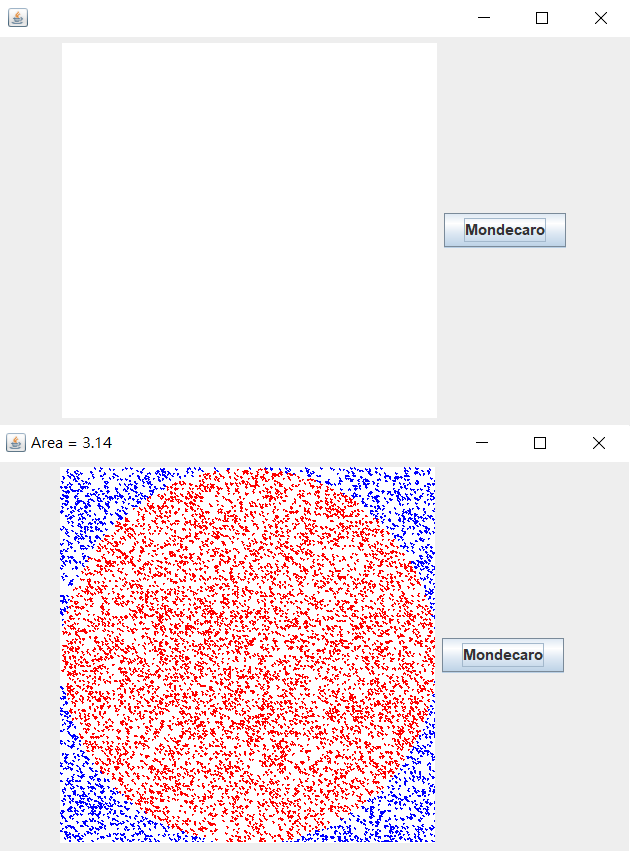

```
import javax.swing.*;
import javax.swing.event.*;
import java.awt.*;
import java.awt.event.*;
import java.util.Random;
public class Mondecaro extends JFrame implements ActionListener {
    private JButton button;
    private JPanel panel;
    private int height = 300, width = 300;
    public static void main (String[] argv) {
        Mondecaro frame = new Mondecaro();
        frame.setSize(520, 350);
        frame.createGUI();
        frame.setVisible(true);
    }
    private void createGUI() {
        setDefaultCloseOperation(EXIT_ON_CLOSE);
        Container window = getContentPane();
        window.setLayout(new FlowLayout());
        panel = new JPanel();
        panel.setPreferredSize(new Dimension(width, height));
        panel.setBackground(Color.white);
        window.add(panel);
        button = new JButton("Mondecaro");
        window.add(button);
        button.addActionListener(this);
    }
    public void actionPerformed(ActionEvent e) {
        draw();
    }
    private void draw() {
        Graphics paper = panel.getGraphics();
        paper.setColor(Color.white);
        paper.fillRect( 0, 0, width, height);
        paper.setColor(Color.black);
        int px = width, py = height / 2;
        Random random = new Random ();
        int n = width / 2, in = 0, N = 10000;
        for (int i = 1; i <= N; i++) {
            int x = random.nextInt(width);
            int y = random.nextInt(width);
            double dist = Math.sqrt(Math.pow(x - n, 2) + Math.pow(y - n, 2));
            if (dist < n) {
                paper.setColor(Color.red);
                in++;
            } else {
                paper.setColor(Color.blue);
            }
            paper.drawOval( x, y, 1, 1);
            setTitle("Area = " + (double)in / i * 4);
            for (int k = 0; k < 1000; k++); 
        }
    }
}
```

In [1]:
import random
total = [10, 100, 1000, 10000, 100000, 1000000, 5000000]  #随机点数
for t in total:
    in_count = 0
    for i in range(t):
        x = random.random()
        y = random.random()
        dis = (x**2 + y**2)**0.5
        if dis<=1:
            in_count += 1
    print(t,'个随机点时，π 是：', 4 * in_count/t)


10 个随机点时，π 是： 2.8
100 个随机点时，π 是： 3.0
1000 个随机点时，π 是： 3.044
10000 个随机点时，π 是： 3.1232
100000 个随机点时，π 是： 3.15028
1000000 个随机点时，π 是： 3.141328
5000000 个随机点时，π 是： 3.1407488


# 2. 概述

蒙特卡罗方法是一种计算方法。原理是通过大量随机样本，去了解一个系统，进而得到所要计算的值。
 
它非常强大和灵活，又相当简单易懂，很容易实现。对于许多问题来说，它往往是最简单的计算方法，有时甚至是唯一可行的方法。它诞生于上个世纪 40 年代美国的"曼哈顿计划"，名字来源于赌城蒙特卡罗，象征概率。

## 蒙特卡罗方法的应用

通常蒙特卡罗方法可以粗略地分成两类：

一类是所求解的问题本身具有内在的随机性，借助计算机的运算能力可以直接模拟这种随机的过程。例如在核物理研究中，分析中子在反应堆中的传输过程。中子与原子核作用受到量子力学规律的制约，人们只能知道它们相互作用发生的概率，却无法准确获得中子与原子核作用时的位置以及裂变产生的新中子的行进速率和方向。科学家依据其概率进行随机抽样得到裂变位置、速度和方向，这样模拟大量中子的行为后，经过统计就能获得中子传输的范围，作为反应堆设计的依据。

另一种类型是所求解问题可以转化为某种随机分布的特征数，比如随机事件出现的概率，或者随机变量的期望值。通过随机抽样的方法，以随机事件出现的频率估计其概率，或者以抽样的数字特征估算随机变量的数字特征，并将其作为问题的解。这种方法多用于求解复杂的多维积分问题。

# 3.  π 的计算

第一个例子是，如何用蒙特卡罗方法计算圆周率π。正方形内部有一个相切的圆，它们的面积之比是 π/4

现在，在这个正方形内部，随机产生 10000 个点（即 10000 个坐标对 (x, y)），计算它们与中心点的距离，从而判断是否落在圆的内部。

如果这些点均匀分布，那么圆内的点应该占到所有点的 π/4，因此将这个比值乘以4，就是π的值。通过R语言脚本随机模拟30000个点，π的估算值与真实值相差0.07%。

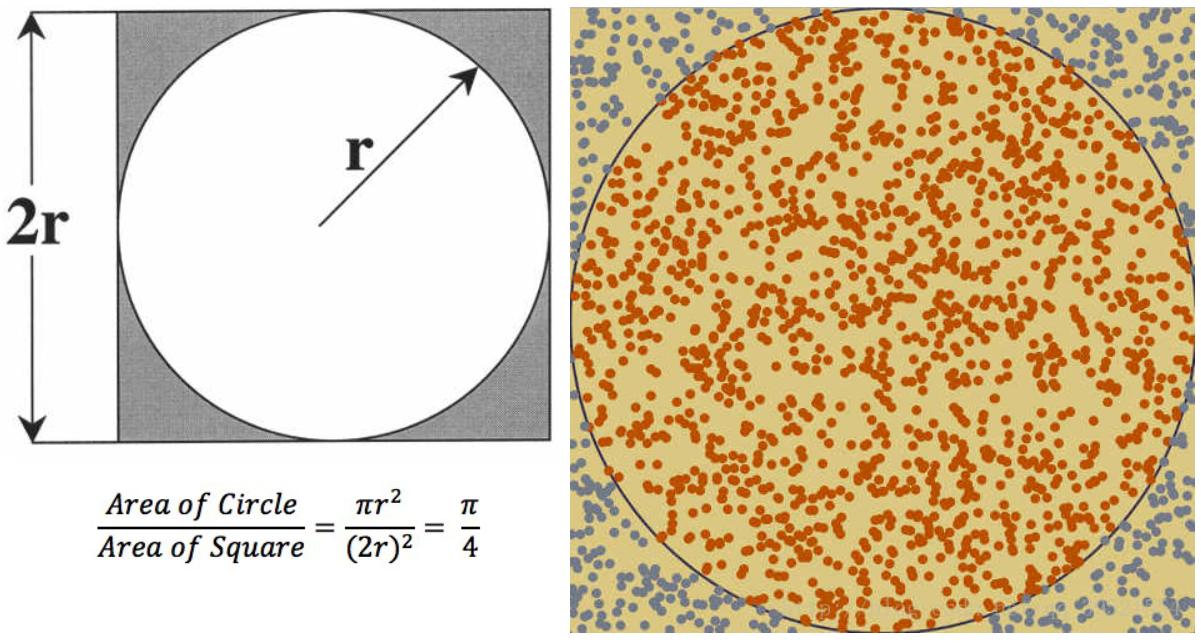

In [2]:
import numpy as np
import tqdm
#random_generate = np.random.uniform(low=0.0, high=2.0, size=(1, 1))

#求解 pi
sum = 0
for i in tqdm.tqdm(range(3000000)):
        #random_generate = np.random.rand(2
        random_generate = np.random.uniform(low=0.0, high=2.0, size=(2))
        if np.sum(np.square(random_generate-np.array([1.0, 1.0]))) <=1:
                sum += 1
print(sum)
pi = 4 * (sum / 3000000)
print('pi is:{}'.format(pi))


100%|██████████| 3000000/3000000 [02:23<00:00, 20879.56it/s]

2355865
pi is:3.1411533333333335


# 4. 蒙特卡罗方法求定积分

比如积分 $\theta=\int_{a}^{b} f(x) d x$ ，如果f(x)的原函数很难求解，那么这个积分也会很难求解。

而通过蒙特卡罗方法对其进行模拟求解的方式有二。

## (1) 随机投点法

这个方法和上面的两个例子的方法是相同的。如图所示，有一个函数f(x)，要求它从a到b的定积分，其实就是求曲线下方的面积：

这时可以用一个比较容易算得面积的矩型罩在函数的积分区间上（假设其面积为 Area），然后随机地向这个矩形框里面投点，其中落在函数f(x)下方的点为绿色，其它点为红色，然后统计绿色点的数量占所有点（红色+绿色）数量的比例为r，那么就可以据此估算出函数f(x)从 a 到 b 的定积分为 Area × r。

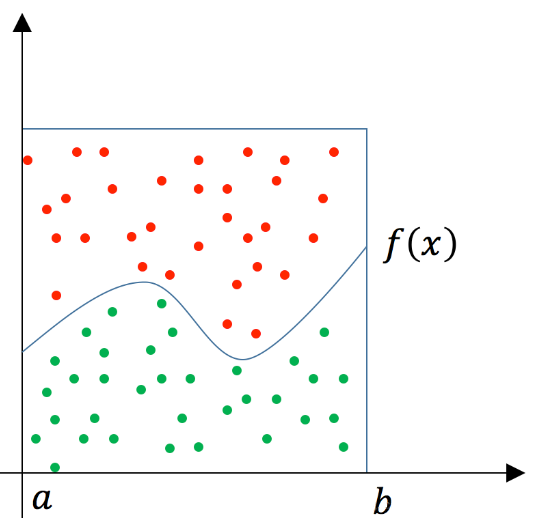

In [3]:
# 求解定积分 x^2 区间[1, 2]; 投点法
import numpy as np
import tqdm
sum = 0
for i in tqdm.tqdm(range(3000000)):

        random_generate = np.array([np.random.uniform(1, 2), np.random.uniform(0, 4)])
        if np.square(random_generate[0]) > random_generate[1]:
                sum += 1
print(sum)
area = 4 * sum / 3000000
print('Area is:{}'.format(area))


100%|██████████| 3000000/3000000 [01:19<00:00, 37634.71it/s]

1750288
Area is:2.3337173333333334


## (2) 平均值法 (期望法)

如下图所示，在 [a,b] 之间随机取一点 x 时，它对应的函数值就是 f(x)，我们要计算 $\theta=\int_{a}^{b} f(x) d x$，就是图中阴影部分的面积。

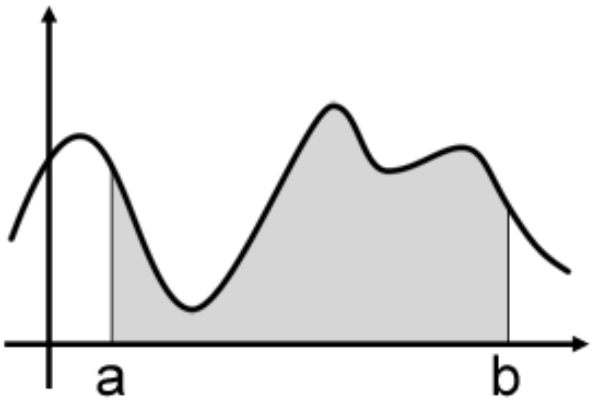

一个简单的近似求解方法就是用 $f(x) *(b-a)$ 来粗略估计曲线下方的面积，在 [a,b] 之间随机取点 x，用 f(x) 代表在 [a,b] 上所有 f(x) 的值，如下图所示：

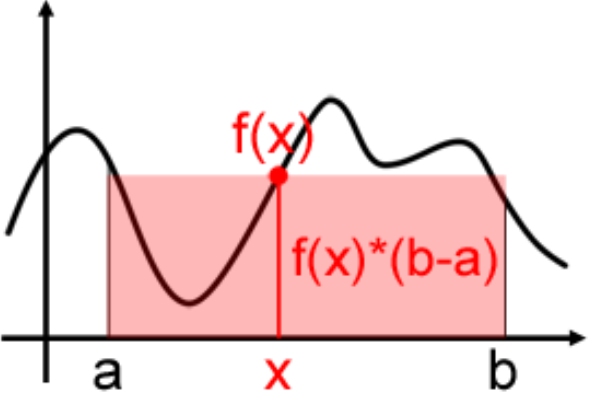

用一个值代表 [a,b] 区间上所有的 ( ) 的值太粗糙了，我们可以进一步抽样更多的点，比如下图抽样了四个随机样本 $x_{1}, x_{2}, x_{3}, x_{4} $ (满足均匀分布)，每个样本都能求出一个近似面积值 $f(x_{i}) * (b - a)$ ，然后计算他们的数学期望，就是蒙特卡罗计算积分的平均值法了。

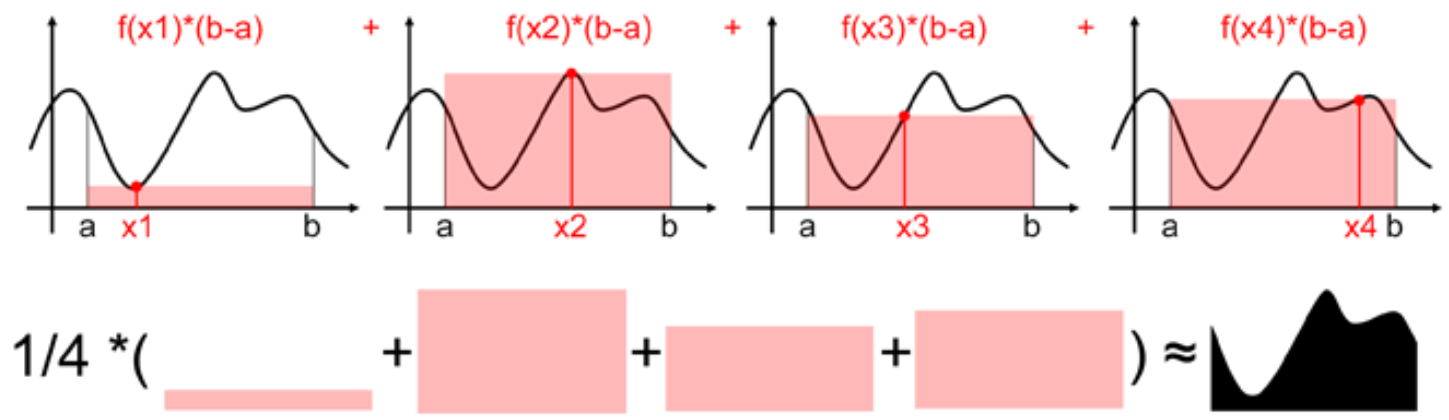

用数学公式表述上述过程：

$S = \frac{1}{4} [f(x_{1})(b - a) + f(x_{2})(b - a) + + f(x_{3})(b - a) + + f(x_{4})(b - a)] = \frac{1}{4} (b - a)(f(x_{1}) + f(x_{2}) + f(x_{3}) + f(x_{4})) = \frac{1}{4} (b - a)\sum_{i=1}^{4} f(x_{i}) $

然后进一步我们采样 n 个随机样本 (满足均匀分布)，则有：

$S = \frac{b - a}{n} \sum_{i=1}^{n} f(x_{i})\simeq \theta$

采样点越多，估计值也就越来越接近。

上面的方法是假定 x 在 [a,b] 间是均匀分布的，而大多时候 x 在 [a,b] 上不是均匀分布的，因此上面方法就会存在很大的误差。

这时我们假设x在[a,b]上的概率密度函数为 $p(x)$ ，加入到 $\theta=\int_{a}^{b} f(x) d x$ 中变换为：

 $\theta=\int_{a}^{b} f(x) d x = \int_{a}^{b} \frac{f(x)}{p(x)} p(x) d x \simeq \frac{1}{n} \sum_{i=1}^{n} \frac{f(x_{i})}{p(x_{i})}$

这就是蒙特卡罗期望法计算积分的一般形式。那么问题就换成了如何从 $p(x)$ 中进行采样。


In [4]:
# 求解定积分 X^2 区间 [1， 2]; 平均法
import numpy as np
import tqdm
sum = 0
for i in tqdm.tqdm(range(3000000)):
        random_x = np.random.uniform(1, 2, size=None)
        # None 是默认的也可以不写
        a =  np.square(random_x)
        sum += a*(2-1)
area = sum/3000000
print('calculate by mean_average:{}'.format(area))


100%|██████████| 3000000/3000000 [00:37<00:00, 81077.99it/s]

calculate by mean_average:2.3338971384883616


# 5. 蒙特卡洛法高维数值积分 Vegas

高能物理研究经常要用到高维函数的数值积分。传统的数值积分方法，比如梯形公式，辛普森积分，Gauss Quadrature 已经统统失效。原因很简单，那些算法每个维度需要至少 M 个离散的数据点，对于 N 维积分，需要在 $M^{N}$ 个点上计算函数取值。

比如 10 维积分，每个维度用最节省的 15 个点的 Gauss Quadrature，需要计算的函数值的次数也达到了 $M^{N} = 15^{10} = 576650390625$ 约 5766 亿次。

出现这种情况一般称作维数灾难。

在此使用蒙特卡洛积分算法 Vegas 做高维数值积分，而 Python 的 Vegas 库的安装以及 Vegas 蒙卡积分的原理如下。

## (1) VEGAS 高维函数蒙特卡洛积分

安装 vegas 库很简单，在命令行使用如下命令

```
pip install vegas
```

计算如下 4 维高斯函数

$f(x_{0}, x_{1}, x_{2}, x_{3}) = N exp( - \sum_{i=0}^{3} (x_{i} - \frac{1}{2})^{2} / 0.01 )$

在闭区间 $x_{0} \in [-1, 1], x_{1} \in [0, 1], x_{2} \in [0, 1], x_{3} \in [0, 1]$

上的数值积分。其中 N = 1013.211 是一个归一化因子。

In [5]:
# copy and paste to test.py
import vegas
import math

def f(x):
    dx2 = 0
    for d in range(4):
        dx2 += (x[d] - 0.5) ** 2
    return math.exp(-dx2 * 100.) * 1013.2118364296088

integ = vegas.Integrator([[-1, 1], [0, 1], [0, 1], [0, 1]])

result = integ(f, nitn=10, neval=1000)
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.04(69)        1.04(69)            0.00     1.00
  2   0.83(31)        0.87(28)            0.08     0.78
  3   1.10(25)        1.00(19)            0.24     0.79
  4   0.922(74)       0.932(69)           0.21     0.89
  5   1.052(62)       0.999(46)           0.58     0.68
  6   0.965(27)       0.974(23)           0.54     0.74
  7   0.996(21)       0.986(16)           0.53     0.78
  8   0.982(17)       0.984(12)           0.46     0.86
  9   1.002(15)       0.9910(92)          0.51     0.85
 10   0.998(12)       0.9934(74)          0.48     0.89

result = 0.9934(74)    Q = 0.89


可以看到 result.summary() 返回了 10 次迭代的结果。

如果只想返回最终结果，去掉 summary(),

EX : result = 1.0101(93)

result 是一个 gvar 类型的数，括号里的数表示误差

- 使用 result.mean 返回均值 1.0101

- 使用 result.sdev 返回不确定部分 0.0093

如果积分变量 x[1] 的积分上限依赖积分变量 x[0], 如

$\int_{0}^{1} d x_{0} \int_{0}^{x_{0}} d x_{1} \sin(x_{0}x_{1})$

被积函数可以这样写


In [6]:
def f(x):
    if x[1] > x[0]: return 0
    return sin(x[0]*x[1])

## (1) 蒙特卡洛积分 - 重要抽样法

这里忽略黎曼积分的适用性以及勒贝格积分的优越性讨论，来自 Mathematica 关于黎曼求和、黎曼积分的例子

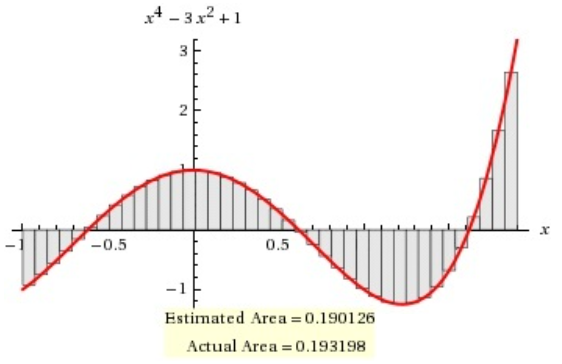

黎曼积分 原理指导我们，为了求一维函数 f(x) 在闭区间 [a, b] 上的定积分，可以先把区间分成 n 份， $a<x_{1}<x_{2}<\cdots<x_{n-1}<b$  , 其中格子大小为 $\Delta x_{i}=x_{i+1}-x_{i}$ 。

函数的积分近似等于小格子中任一处的函数值 $f\left(x_{i}^{*}\right)$ 乘以 $\Delta x_{i}$ ，并对所有格子求和。

$F \approx \sum_{i} f\left(x_{i}^{*}\right) \Delta x_{i}$

因此可以使用均匀分布抽样出的 $x_{i}$ 点上函数值 $f(x_{i})$ 乘以平均间距 $\frac{x_{max}-x_{min}}{N}$ 求和来近似黎曼积分。


$F=\int_{x_{\min }}^{x_{\max }} f(x) d x \approx \frac{x_{\max }-x_{\min }}{N} \sum_{i=1}^{N} f\left(x_{i}\right)$


如果是高维积分，只需要把右边的 $x_{max} - x_{min}$ 换成体积 $\mathcal{V}$ , 积分公式变为，

$F \approx \frac{\mathcal{V}}{N} \sum_{i}^{N} f\left(x_{i}\right) \approx \mathcal{V} \mathrm{E}\left[f\left(x_{i}\right)\right] $

其中 $\mathrm{E}[f]$ 表示 $f$ 在均匀分布下的期望值。

马文淦的《计算物理》中介绍，根据中心极限定理，因为 F 是大量随机变量 $f(x_{i})$ 的求和，它的值满足正态分布。

蒙卡积分的误差 $\propto \frac{\sigma\left(f_{x_{i}}\right)}{\sqrt{n}}$ ，因此有两种办法可以提高蒙特卡洛积分的精度。

第一种是多撒点，将撒点个数 $n$ 每增加 100 倍，蒙卡积分的误差就会减小为原来的十分之一。这个结论独立于积分的维数。

第二种是减小 $x_{i}$ 点上集合 $\left\{f\left(x_{i}\right)\right\}$ 的涨落 $\propto (f x_{i})$ 。


如果 $f(x) = c$ 是常数，则集合 $\left\{f\left(x_{i}\right)\right\}$ 的方差最小，为 $\sigma^{2}=\left\langle(f-\langle f\rangle)^{2}\right\rangle=0$ 。

当 $f(x)$ 偏离均匀分布，在局部有很尖的峰，则集合  $\left\{f\left(x_{i}\right)\right\}$ 的方差 (涨落) 就会比较大。

减小被积函数方差的方法是选择一个与 $f(x)$ 形式相近，但比较好抽样的函数 $g(x)$, 将积分写为，

$F=\int_{\mathcal{V}} \frac{f(x)}{g(x)} g(x) d x=\mathcal{V} \mathbb{E}_{g}\left[\frac{f(x)}{g(x)}\right] $

其中期望值 $\mathbb{E}_{g}$ 表示按照概率密度函数 $g(x)$ 抽样出一系列点 $x_{i}$ ，并使用这些点计算 $f(x)/g(x)$ 的均值，

$\frac{1}{N} \sum_{i}^{N} \frac{f\left(x_{i}\right)}{g\left(x_{i}\right)}$

此时，因为 $f(x) ~ g(x)$ ，被积函数 $f(x)/g(x) ~ 1$ 接近常数， $\left\{f\left(x_{i}\right) / g\left(x_{i}\right) \right\}$ 方差更小，从理论上降低蒙卡积分的误差。

与暴力增加 n 相比， $g(x)$ 函数的具体形式依赖于被积函数。

Vegas 积分就是要使用适配的方式，自动寻找 g(x)。


## (2) 自适应方法做重要抽样

VEGAS 积分有两个版本。经典版本 VEGAS 与进化版本 VEGAS+。下面是 VEGAS+ 文章的摘要。

> We describe a new algorithm, VEGAS+, for adaptive multidimensional Monte Carlo integration. The new algorithm adds a second adaptive strategy, adaptive stratified sampling, to the adaptive importance sampling that is the basis for its widely used predecessor VEGAS. Both VEGAS and VEGAS+ are effective for integrands with large peaks, but VEGAS+ can be much more effective for integrands with multiple peaks or other significant structures aligned with diagonals of the integration volume. We give examples where VEGAS+ is 2-17 times more accurate than VEGAS. We also show how to combine VEGAS+ with other integrators, such as the widely available MISER algorithm, to make new hybrid integrators. For a different kind of hybrid, we show how to use integrand samples, generated using MCMC or other methods, to optimize VEGAS+ before integrating. We give an example where preconditioned VEGAS+ is more than 100 times as efficient as VEGAS+ without preconditioning. Finally, we give examples where VEGAS+ is more than 10 times as efficient as MCMC for Bayesian integrals with D = 3 and 21 parameters. We explain why VEGAS+ will often outperform MCMC for small and moderate sized problems.

原始 VEGAS 积分将积分区域分成 N 份，然后动态调整每份的宽度 $\Delta x_{i} $ ，使得 $f\left(x_{i}\right) \Delta x_{i} $ 的值趋于常数。即

$f\left(x_{0}\right) \Delta x_{0} \approx f\left(x_{1}\right) \Delta x_{1} \approx \ldots \approx f\left(x_{n}\right) \Delta\left(x_{n}\right)=\text { const }$

这种方法使 $f(x)$ 值较大的地方，格子分的细，$f(x)$ 值较小的地方，格子分的粗。从而完成重要抽样的目的，减小积分误差。

原始 VEGAS 积分对于峰值平行于自变量方向的函数比较有效。

如果被积函数有多个峰值，则会产生很多 "假峰" 区域。

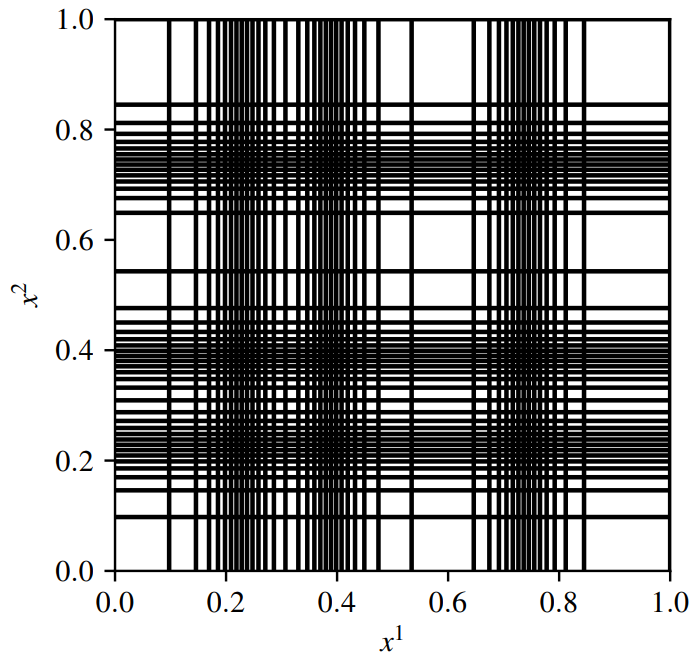

比如二维积分，有 3 个峰值，区域在红色圆圈附近，根据原始 VEGAS 积分的自适应方法，会额外产生 6 个"假峰"，用蓝色 x 标记，被积函数 $f(x^{1}, x^{2})$ 在这些区域的值接近于 0，而自适应方法会在这 6 个区域产生很多积分点，导致 原始 VEGAS 积分效率低下。

在高维积分中，如果被积函数有多个对角峰值，情况会更加严重。比如 10 维下的 3 对角峰值，这样的 "假峰" 会有 $3^{10} - 3$ 个。

进化版 VEGAS+ 额外加入自适应分层抽样 Adaptive Stratified Integration。

将积分区域分成很多小的超立方 cube，如果某个 cube 中的积分值多次迭代方差较大，就将区域细分。做多个峰值的积分更高效，比原始版本精度提高 2 到 17 倍。这种方法别的很多地方用到，比如 MISER，FOAM，ZMCIntegral 等。


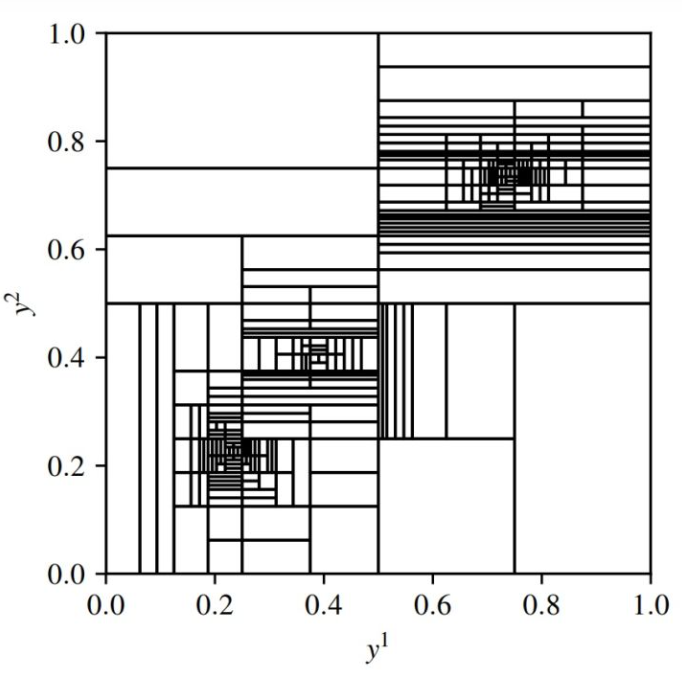

MISER 自适应分层抽样法

自适应重要抽样加分层抽样法加成的 VEGAS+ 在多个高维积分任务上都表现不错。

另外，2009年的文章还提到一种新方法，使用马尔科夫链蒙特卡洛 MCMC 先寻找被积函数的峰值位置，预产生一些积分位置，然后送入 VEGAS+ 中，可以比从零开始的 VEGAS+ 加速 100 倍。